<a href="https://colab.research.google.com/github/emiliomercuri/EnvHidrology2024/blob/main/aulas/2024_03_22-Aula_08/Gr%C3%A1fico_com_a_bacia_e_a_Exut%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráfico com a bacia e a Exutória

In [1]:
import requests
import zipfile
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from shapely import geometry, ops
import fiona
import geopandas as gpd
from datetime import datetime, timedelta

In [2]:
# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "rede_estacoes_ANA"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download data
with open(data_path / "2024-03-14_Estacoes_Rede_Hidrometeorologica_Nacional.zip", "wb") as f:
  request = requests.get("https://github.com/emiliomercuri/EnvHidrology2024/raw/4f8c68aca7ecc91615efe0249fa5f09da27c1d5e/aulas/2024_03_14-Aula_06/2024-03-14_Estacoes_Rede_Hidrometeorologica_Nacional.zip")
  print("Donwloading data...")
  f.write(request.content)

# Unzip data
with zipfile.ZipFile(data_path / "2024-03-14_Estacoes_Rede_Hidrometeorologica_Nacional.zip", "r") as zip_ref:
  print("Unzipping shapefile estacoes...")
  zip_ref.extractall(image_path)



data/rede_estacoes_ANA does not exist, creating one...
Donwloading data...
Unzipping shapefile estacoes...


In [3]:
# Deletar uma pasta criada pelo Compactador
!rm -rf /content/data/rede_estacoes_ANA/__MACOSX

In [4]:
# Cria um diretório para armazenar as imagens
!mkdir img

In [5]:
# Atualizar o Google Download
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [6]:
# download dos arquivos CABra_boundaries shapefiles
!gdown '1nR8_kvtnhjZAHeSMkRUFV_59g_SmzZlc'

# cria uma pasta para armazenar os arquivos shapefile
!mkdir shapefiles_CABra

!unzip CABra_boundaries.zip -d shapefiles_CABra

Downloading...
From (original): https://drive.google.com/uc?id=1nR8_kvtnhjZAHeSMkRUFV_59g_SmzZlc
From (redirected): https://drive.google.com/uc?id=1nR8_kvtnhjZAHeSMkRUFV_59g_SmzZlc&confirm=t&uuid=40535494-183b-45ce-a386-e85cace5468a
To: /content/CABra_boundaries.zip
100% 48.0M/48.0M [00:01<00:00, 38.5MB/s]
Archive:  CABra_boundaries.zip
  inflating: shapefiles_CABra/CABra_boundaries.shx  
  inflating: shapefiles_CABra/CABra_boundaries.cpg  
  inflating: shapefiles_CABra/CABra_boundaries.dbf  
  inflating: shapefiles_CABra/CABra_boundaries.prj  
  inflating: shapefiles_CABra/CABra_boundaries.sbn  
  inflating: shapefiles_CABra/CABra_boundaries.sbx  
  inflating: shapefiles_CABra/CABra_boundaries.shp  
  inflating: shapefiles_CABra/CABra_boundaries.shp.xml  


In [7]:
shp_CABra = gpd.read_file('shapefiles_CABra/CABra_boundaries.shp')
rede_ANA = gpd.read_file('data/rede_estacoes_ANA/Estacoes_Rede_Hidrometeorologica_Nacional/Estacoes_Fluviometricas_e_Pluviometricas_da_Rede.shp')

In [8]:
rede_ANA

,EST_ID,REGISTROID,BACIA,RIO,ESTADO,MUNICIPIO,RESPONSAVE,OPERADORA,OPERADORA_,ROTEIRO,...,PERIODOREG,PERIODODES,PERIODOSED,PERIODOQUA,PERIODOPLU,PERIODOR_1,PERIODOTAN,PERIODOCLI,PERIODOTEL,geometry
0,34355,6896269,"ATLÂNTICO,TRECHO NORTE/NORDESTE",None,PA,MARACANÃ,IDESP,IDESP,None,None,...,None,None,None,None,1972-03-01,None,None,None,None,POINT (-47.50000 -0.83333)
1,35234,6896270,"ATLÂNTICO,TRECHO NORTE/NORDESTE",None,PA,SALINÓPOLIS,ANA,CPRM,CPRM-BE,2,...,None,None,None,None,1977-12-01,1977-12-01,1977-12-01,None,2010-08-01,POINT (-47.35360 -0.62310)
2,34405,6896271,"ATLÂNTICO,TRECHO NORTE/NORDESTE",None,PA,CURUÇA,ANA,CPRM,CPRM-BE,2,...,None,None,None,None,1981-03-01,1987-08-01,None,None,2010-08-01,POINT (-47.85360 -0.73750)
3,35245,6896272,"ATLÂNTICO,TRECHO NORTE/NORDESTE",None,PA,PRIMAVERA,ANA,CPRM,CPRM-BE,2,...,None,None,None,None,1982-02-01,None,None,None,None,POINT (-47.09940 -0.92940)
4,15374,6896273,"ATLÂNTICO,TRECHO NORTE/NORDESTE",None,PA,MARAPANIM,ANA,CPRM,CPRM-BE,2,...,None,None,None,None,1989-08-01,None,None,None,None,POINT (-47.65830 -0.63360)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21987,14737,3737219,"ATLÂNTICO, TRECHO SUDESTE",ARROIO FRAGATA,RS,PELOTAS,ANA,CPRM,CPRM-PA,2,...,None,1964-10-01,None,2009-01-01,None,None,None,None,None,POINT (-52.47670 -31.71390)
21988,13054,53322747,"ATLÂNTICO, TRECHO SUDESTE",CANAL DE SÃO GONÇALO,RS,PELOTAS,FEPAM-RS,FEPAM-RS,None,None,...,None,None,None,2015-03-01,None,None,None,None,None,POINT (-52.28860 -31.77310)
21989,12951,53322748,"ATLÂNTICO, TRECHO SUDESTE",ARROIO PELOTAS,RS,PELOTAS,FEPAM-RS,FEPAM-RS,None,None,...,None,None,None,2015-03-01,None,None,None,None,None,POINT (-52.28310 -31.75750)
21990,12952,3737222,"ATLÂNTICO, TRECHO SUDESTE",ARROIO PELOTAS,RS,PELOTAS,ANA,CPRM,CPRM-PA,2,...,None,1964-08-01,None,1983-06-01,None,None,None,None,None,POINT (-52.46250 -31.57360)


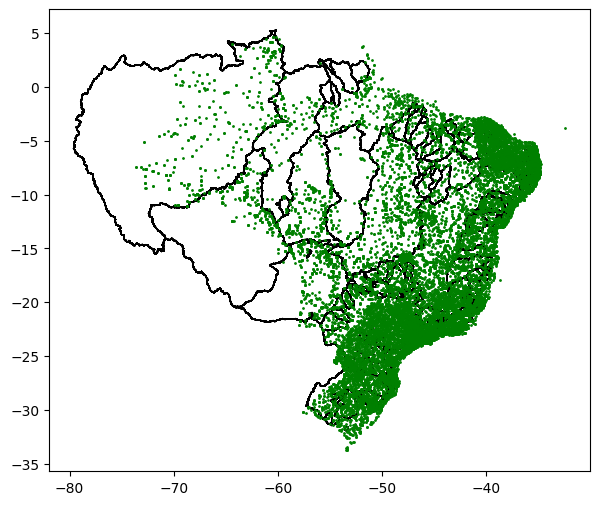

In [9]:
# Plot all the catchments
fig, ax = plt.subplots(figsize=(8,6))
shp_CABra.plot(ax=ax,color='white', edgecolor='black')
rede_ANA.plot(ax=ax,marker='o', color='green', markersize=1)
plt.show()

In [10]:
# Encontrando a linha do dataframe que tem o ID_CABra == 1
shp_CABra[shp_CABra['ID_CABra']==1]

,area_CABra,gauge_ANA,ID_CABra,X_outlet,Y_outlet,geometry
352,243410.278886,13880000.0,1.0,-64.384,-6.541,"MULTIPOLYGON (((-68.44875 -7.14875, -68.44708 ..."


In [11]:
#get shape from watershed 352
shape_352 = shp_CABra.loc[shp_CABra['ID_CABra']==1]

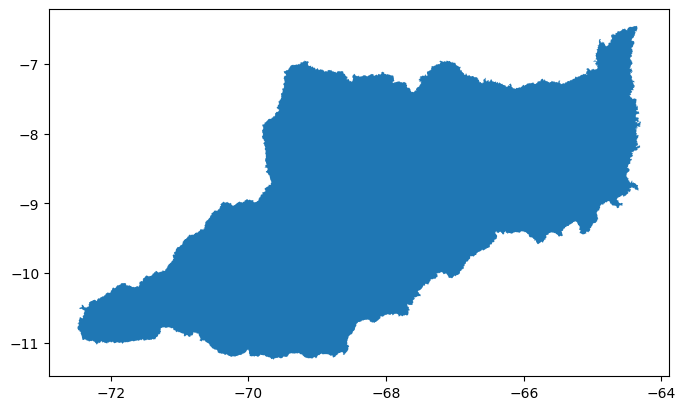

In [12]:
# Plot the catchment
fig, ax = plt.subplots(figsize=(8,6))
shape_352.plot(ax=ax)
plt.show()

In [13]:
rede_ANA[rede_ANA['CODIGO'] == 865000]

,EST_ID,REGISTROID,BACIA,RIO,ESTADO,MUNICIPIO,RESPONSAVE,OPERADORA,OPERADORA_,ROTEIRO,...,PERIODOREG,PERIODODES,PERIODOSED,PERIODOQUA,PERIODOPLU,PERIODOR_1,PERIODOTAN,PERIODOCLI,PERIODOTEL,geometry
3026,34694,3740153,RIO AMAZONAS,None,AM,LÁBREA,ANA,CONSTRUFAM,CONSTRUFAM-RO,3,...,None,None,None,None,1982-06-01,None,None,None,None,POINT (-65.71940 -8.33440)


In [16]:
rede_ANA[rede_ANA['CODIGO'] == 13880000]

,EST_ID,REGISTROID,BACIA,RIO,ESTADO,MUNICIPIO,RESPONSAVE,OPERADORA,OPERADORA_,ROTEIRO,...,PERIODOREG,PERIODODES,PERIODOSED,PERIODOQUA,PERIODOPLU,PERIODOR_1,PERIODOTAN,PERIODOCLI,PERIODOTEL,geometry
12620,7476,3730064,RIO AMAZONAS,RIO PURUS,AM,CANUTAMA,ANA,CONSTRUFAM,CONSTRUFAM-RO,1,...,None,1967-06-01,2008-07-01,2007-07-01,None,None,None,None,2004-11-01,POINT (-64.38580 -6.53890)


In [17]:
rede_ANA.loc[12620]

EST_ID                                                 7476
REGISTROID                                          3730064
BACIA                                          RIO AMAZONAS
RIO                                               RIO PURUS
ESTADO                                                   AM
MUNICIPIO                                          CANUTAMA
RESPONSAVE                                              ANA
OPERADORA                                        CONSTRUFAM
OPERADORA_                                    CONSTRUFAM-RO
ROTEIRO                                                   1
TIPOESTACA                                    Fluviométrica
CODIGO                                             13880000
NOME                                               CANUTAMA
LATITUDE                                            -6.5389
LONGITUDE                                          -64.3858
AREADRENAG                                         236000.0
OPERANDO                                

In [19]:
#get shape
shape_exutoria = rede_ANA.loc[rede_ANA['CODIGO'] == 13880000]

In [14]:
#get shape from 3026
shape_3026 = rede_ANA.loc[rede_ANA['CODIGO'] == 865000]

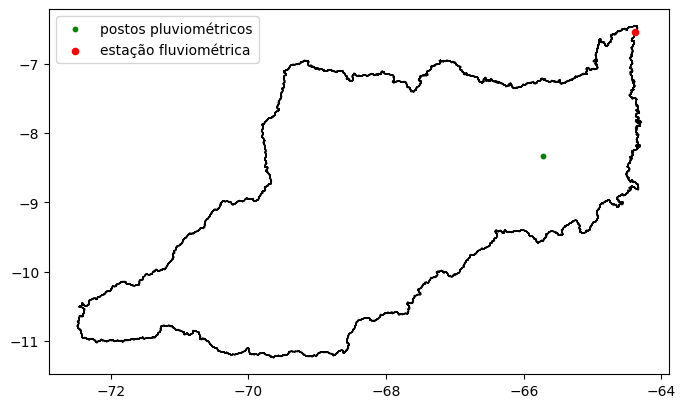

In [21]:
# Plot all the catchment and hidrometric station
fig, ax = plt.subplots(figsize=(8,6))
shape_352.plot(ax=ax,color='white', edgecolor='black')
shape_3026.plot(ax=ax,marker='o', color='green', markersize=10, label='postos pluviométricos' )
shape_exutoria.plot(ax=ax,marker='o', color='red', markersize=20, label='estação fluviométrica')
plt.legend()
plt.show()